<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
await piplite.install(['urllib'])
await piplite.install(['request'])

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [107]:
from urllib import request
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
with request.urlopen(URL) as response:
    data = response.read().decode('utf-8')

In [108]:
boston_df = pd.read_csv(io.StringIO(data))

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [109]:
boston_df['COUNT'] = boston_df['Unnamed: 0'] + 1
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,COUNT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,3
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,502
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,503
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,504
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,505


For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')

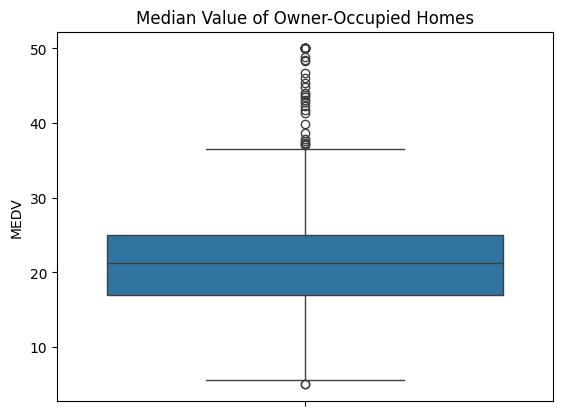

In [110]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Value of Owner-Occupied Homes")

Provide a  bar plot for the Charles river variable

C:\Users\sebrestr\AppData\Local\Temp\ipykernel_1536\1993143072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="CHAS", y="COUNT", data=boston_df[['CHAS', 'COUNT']].groupby('CHAS').count(), palette='rainbow')


Text(0.5, 1.0, 'Charles River')

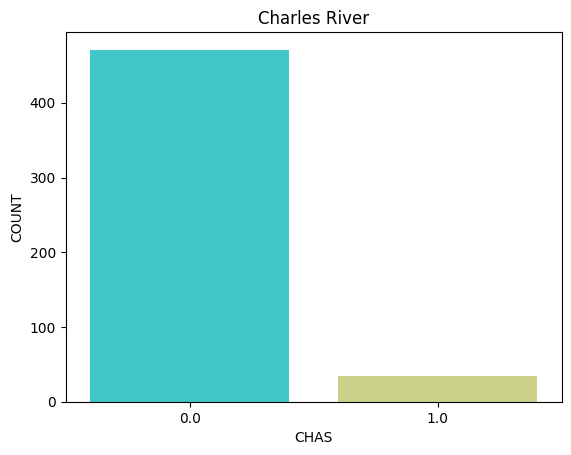

In [111]:
ax = sns.barplot(x="CHAS", y="COUNT", data=boston_df[['CHAS', 'COUNT']].groupby('CHAS').count(), palette='rainbow')
plt.title("Charles River")

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

C:\Users\sebrestr\AppData\Local\Temp\ipykernel_1536\590407239.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35 years and younger' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
C:\Users\sebrestr\AppData\Local\Temp\ipykernel_1536\590407239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df, palette='rainbow', order=['35 years and younger', 'between 35 and 70 years','70 years and older'])


Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes Per Age Group')

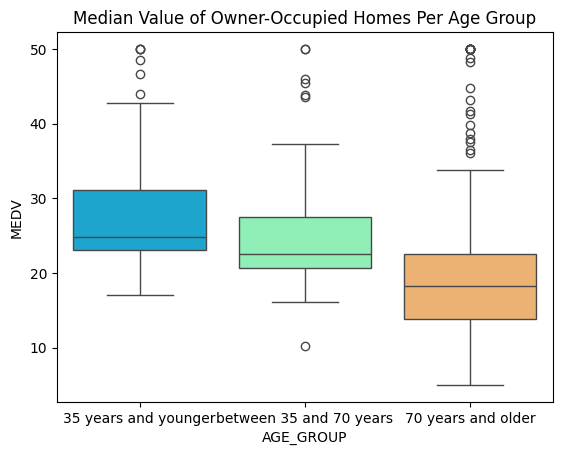

In [112]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

ax = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df, palette='rainbow', order=['35 years and younger', 'between 35 and 70 years','70 years and older'])
plt.title("Median Value of Owner-Occupied Homes Per Age Group")

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship Between  Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres Per Town')

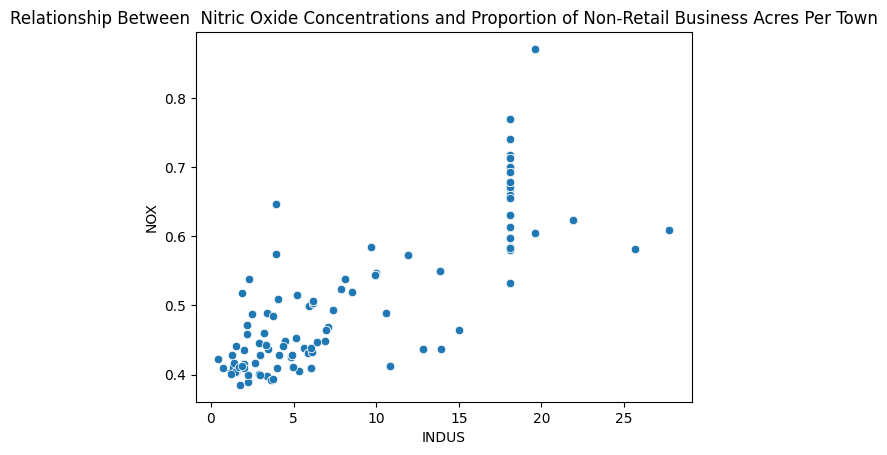

In [113]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Relationship Between  Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres Per Town")

Seems that there is a positive correllation beetween the nitric oxide concentration and the proportion of non-retail business acres per town, I mean, that if the proportion of non-retail business acres per town increase, the nitric oxide concentration too, and that have sense, more business acress implies population arround this kind of business, more population and more traffic flow produce higher temperatures that make the nitrogen and oxigen merge and produce the nitric oxide

Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'pupil-teacher ratio by town')

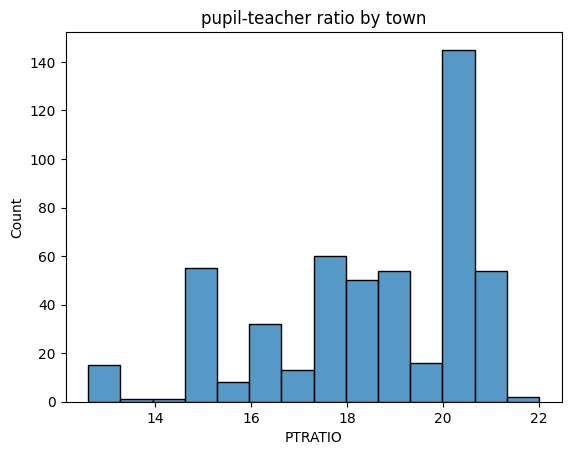

In [114]:
ax = sns.histplot(x='PTRATIO', data=boston_df)
plt.title('pupil-teacher ratio by town')

**1.** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses bounded by the Charles river")

In [115]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['COUNT'],
                   boston_df[boston_df['CHAS'] == 0]['COUNT'], center='median')

LeveneResult(statistic=32.69368545409656, pvalue=1.8501598081642693e-08)

In [116]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['COUNT'],
                   boston_df[boston_df['CHAS'] == 0]['COUNT'], equal_var = True)

TtestResult(statistic=-0.08439251552584794, pvalue=0.9327778682755471, df=504.0)

**Conclusion 1:** Since the p-value is greater than alpha value 0.05, we fail to reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river

_____________________________________________________________________________________________________________

**2.** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population medians are equal)
*   $H\_1:$ At least one of the medians differ

I'm going to use the three groups previously created:
- 35 years and younger
- Between 35 and 70 years
- 70 years and older

In [117]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='median')

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [118]:
thirtyfive_lower_age = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy_age = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older_eval = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_age, thirtyfive_seventy_age, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion 2:** Since the p-value is less than 0.05, we reject the null hypothesis as there is no significant evidence that at least one of the means differ

_____________________________________________________________________________________________________________

**3.** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with the proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

In [119]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**Conclusion 3:** Since the p-value (2-tailed) < 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

_____________________________________________________________________________________________________________

**4.** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [120]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        20:07:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion 4:** The coefficient 1.0916 means that the impact of an additional weighted distances to five Boston employment centres increase in 1.0916 the median value of owner occupied homes

_____________________________________________________________________________________________________________